In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [88]:
df=pd.read_csv('loan_cleaned_dataset_.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,11.183713,0.000000,RENT,10.047334,PERSONAL,16.02,0.314811,1.386294,561.0,No,1
1,21.0,female,High School,9.415971,0.000000,OWN,6.908755,EDUCATION,11.14,0.076961,1.098612,504.0,Yes,0
2,NaN,female,High School,9.428592,1.386294,MORTGAGE,8.612685,MEDICAL,12.87,0.314811,1.386294,635.0,No,1
3,23.0,female,Bachelor,11.286702,0.000000,RENT,10.047334,MEDICAL,15.23,0.314811,1.098612,675.0,No,1
4,24.0,male,Master,11.099469,0.693147,RENT,10.047334,MEDICAL,14.27,0.314811,1.609438,586.0,No,1


In [89]:
df = df.rename(columns={
    'person_age': 'age',
    'person_gender': 'gender',
    'person_education': 'education_level',
    'person_income': 'annual_income',
    'person_emp_exp': 'employment_experience_years',
    'person_home_ownership': 'home_ownership_status',
    'loan_amnt': 'loan_amount',
    'loan_intent': 'loan_purpose',
    'loan_int_rate': 'interest_rate',
    'loan_percent_income': 'loan_to_income_ratio',
    'cb_person_cred_hist_length': 'credit_history_length_years',
    'credit_score': 'credit_score',
    'previous_loan_defaults_on_file': 'prior_default_flag'
})


In [90]:
df['loan_status'].value_counts()


loan_status
0    35000
1    10000
Name: count, dtype: int64

In [91]:
df.columns


Index(['age', 'gender', 'education_level', 'annual_income',
       'employment_experience_years', 'home_ownership_status', 'loan_amount',
       'loan_purpose', 'interest_rate', 'loan_to_income_ratio',
       'credit_history_length_years', 'credit_score', 'prior_default_flag',
       'loan_status'],
      dtype='object')

In [95]:
X=df.drop(['loan_status'],axis=1)
y=df['loan_status']

In [97]:
X.head()

,age,gender,education_level,annual_income,employment_experience_years,home_ownership_status,loan_amount,loan_purpose,interest_rate,loan_to_income_ratio,credit_history_length_years,credit_score,prior_default_flag
0,22.0,female,Master,11.183713,0.000000,RENT,10.047334,PERSONAL,16.02,0.314811,1.386294,561.0,No
1,21.0,female,High School,9.415971,0.000000,OWN,6.908755,EDUCATION,11.14,0.076961,1.098612,504.0,Yes
2,NaN,female,High School,9.428592,1.386294,MORTGAGE,8.612685,MEDICAL,12.87,0.314811,1.386294,635.0,No
3,23.0,female,Bachelor,11.286702,0.000000,RENT,10.047334,MEDICAL,15.23,0.314811,1.098612,675.0,No
4,24.0,male,Master,11.099469,0.693147,RENT,10.047334,MEDICAL,14.27,0.314811,1.609438,586.0,No


In [96]:
df.groupby('loan_status')[['credit_score','interest_rate','annual_income']].mean()


,credit_score,interest_rate,annual_income
loan_status,,,
0,633.029991,10.478246,11.188923
1,632.062380,12.854347,10.820032


 Higher interest rate (12.85)

 Lower income

Slightly lower credit score

Banks give higher interest rate to risky customers.

So :

 loan_status = 1 → Loan Rejected 
 loan_status = 0 → Loan Approved 

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((36000, 13), (9000, 13))

In [99]:
X_train.head()

,age,gender,education_level,annual_income,employment_experience_years,home_ownership_status,loan_amount,loan_purpose,interest_rate,loan_to_income_ratio,credit_history_length_years,credit_score,prior_default_flag
25180,34.0,female,Bachelor,11.485205,2.484907,MORTGAGE,9.615872,PERSONAL,12.73,0.139762,2.302585,631.0,No
12555,25.0,male,High School,11.197584,1.386294,RENT,9.392745,VENTURE,11.86,0.148420,1.609438,659.0,Yes
29153,39.0,NaN,Master,12.035648,2.944439,MORTGAGE,10.047334,PERSONAL,10.37,0.067659,2.484907,683.0,Yes
23838,27.0,male,Associate,11.453526,1.609438,RENT,9.169623,EDUCATION,17.14,0.095310,2.079442,641.0,No
35686,27.0,male,Master,11.348923,2.079442,RENT,8.862200,HOMEIMPROVEMENT,12.97,0.076961,1.386294,706.0,Yes


In [103]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = ['gender', 'home_ownership_status','loan_purpose', 'prior_default_flag']

In [104]:
num_cols

Index(['age', 'annual_income', 'employment_experience_years', 'loan_amount',
       'interest_rate', 'loan_to_income_ratio', 'credit_history_length_years',
       'credit_score'],
      dtype='object')

In [105]:
cat_cols

['gender', 'home_ownership_status', 'loan_purpose', 'prior_default_flag']

In [107]:
ordinal_colum=['education_level']

In [108]:
X_train['education_level'].unique()

array(['Bachelor', 'High School', 'Master', 'Associate', nan, 'Doctorate'],
      dtype=object)

In [109]:
X_train['education_level']

25180       Bachelor
12555    High School
29153         Master
23838      Associate
35686         Master
            ...     
11284    High School
44732    High School
38158      Associate
860           Master
15795    High School
Name: education_level, Length: 36000, dtype: object

In [110]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [111]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'))
])


In [112]:
education_order = [
    ['High School', 
     'Associate', 
     'Bachelor', 
     'Master', 
     'Doctorate']
]


In [113]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=education_order))
])


In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif


preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
    ('ordinal_',ordinal_pipeline,ordinal_colum)
    
],remainder='drop')

In [115]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [116]:
X_train_prep.shape

(36000, 18)

In [117]:
X_test_prep.shape

(9000, 18)

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
    
}


In [120]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
kbest = SelectKBest(score_func=f_classif, k=14)
for name, model in models.items():

    # full pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif, k=12)),
        ('model', model)
    ])

    # train
    pipe.fit(X_train, y_train)

    # predictions
    y_train_pred = pipe.predict(X_train)
    y_test_pred  = pipe.predict(X_test)

    print(name)
    print("Model performance for Training set")
    print(f"- Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"- F1 score: {f1_score(y_train, y_train_pred):.4f}")
    print(f"- Precision: {precision_score(y_train, y_train_pred):.4f}")
    print(f"- Recall: {recall_score(y_train, y_train_pred):.4f}")
    print(f"- Roc Auc Score: {roc_auc_score(y_train, y_train_pred):.4f}")

    print("----------------------------------")

    print("Model performance for Test set")
    print(f"- Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"- F1 score: {f1_score(y_test, y_test_pred):.4f}")
    print(f"- Precision: {precision_score(y_test, y_test_pred):.4f}")
    print(f"- Recall: {recall_score(y_test, y_test_pred):.4f}")
    print(f"- Roc Auc Score: {roc_auc_score(y_test, y_test_pred):.4f}")

    print("=" * 40, "\n")


Logistic Regression
Model performance for Training set
- Accuracy: 0.8914
- F1 score: 0.7462
- Precision: 0.7750
- Recall: 0.7194
- Roc Auc Score: 0.8299
----------------------------------
Model performance for Test set
- Accuracy: 0.8838
- F1 score: 0.7285
- Precision: 0.7617
- Recall: 0.6980
- Roc Auc Score: 0.8176

Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.8931
- F1 score: 0.7640
- Precision: 0.7536
- Recall: 0.7746
- Roc Auc Score: 0.8509

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9997
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9259
- F1 score: 0.8214
- Precision: 0.8893
- Recall: 0.7632
- Roc Auc Score: 0.8679

Gradient Boost
Model performance for Training set
- 

In [121]:
xg_params = {
    "model__n_estimators": [150,200, 300],
    "model__learning_rate": [0.03,0.05],
    "model__max_depth": [3,4,5],
    "model__min_child_weight": [5,7,10],
    
    "model__subsample": [0.7,0.8],
    "model__colsample_bytree": [0.6,0.7],
    "model__gamma": [ 0.2,0.3,0.5],
    "model__scale_pos_weight": [2,3,4],
    "model__reg_alpha": [ 0.5, 1,2],
    "model__reg_lambda": [ 2, 5,10],

   
}


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [122]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

randomcv_models = [
    
    ("XG", XGBClassifier(), xg_params)
]


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

best_models = {}

for name, model, params in randomcv_models:

    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    random_search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=params,
        n_iter=30,
        cv=3,
        scoring='roc_auc',
        verbose=2,
        n_jobs=1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    best_models[name] = random_search.best_estimator_

    print(f"\n🔥 Best parameters for {name}")
    print(random_search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END model__colsample_bytree=0.7, model__gamma=0.5, model__learning_rate=0.03, model__max_depth=5, model__min_child_weight=7, model__n_estimators=200, model__reg_alpha=1, model__reg_lambda=5, model__scale_pos_weight=3, model__subsample=0.8; total time=   2.8s
[CV] END model__colsample_bytree=0.7, model__gamma=0.5, model__learning_rate=0.03, model__max_depth=5, model__min_child_weight=7, model__n_estimators=200, model__reg_alpha=1, model__reg_lambda=5, model__scale_pos_weight=3, model__subsample=0.8; total time=   3.7s
[CV] END model__colsample_bytree=0.7, model__gamma=0.5, model__learning_rate=0.03, model__max_depth=5, model__min_child_weight=7, model__n_estimators=200, model__reg_alpha=1, model__reg_lambda=5, model__scale_pos_weight=3, model__subsample=0.8; total time=   2.8s
[CV] END model__colsample_bytree=0.6, model__gamma=0.2, model__learning_rate=0.03, model__max_depth=4, model__min_child_weight=10, model__n_estimat

In [123]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
models1={
    "Xgboost":XGBClassifier(n_estimators=200,max_depth=5,learning_rate=0.03,subsample=0.8,colsample_bytree=0.7,gamma=0.5,min_child_weight=7,reg_alpha=1,scale_pos_weight=3,reg_lambda=5 )
}
for name, model in models1.items():
    THRESHOLD=0.5

    # full pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # train
    pipe.fit(X_train, y_train)

    # predictions
    y_train_proba = pipe.predict_proba(X_train)[:,1]
    y_test_proba  = pipe.predict_proba(X_test)[:,1]
     # Apply threshold
    y_train_pred = (y_train_proba >= THRESHOLD).astype(int)
    y_test_pred  = (y_test_proba  >= THRESHOLD).astype(int)

    print(name)
    print("Model performance for Training set")
    print(f"- Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"- F1 score: {f1_score(y_train, y_train_pred):.4f}")
    print(f"- Precision: {precision_score(y_train, y_train_pred):.4f}")
    print(f"- Recall: {recall_score(y_train, y_train_pred):.4f}")
    print(f"- Roc Auc Score: {roc_auc_score(y_train, y_train_proba):.4f}")

    print("----------------------------------")

    print("Model performance for Test set")
    print(f"- Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"- F1 score: {f1_score(y_test, y_test_pred):.4f}")
    print(f"- Precision: {precision_score(y_test, y_test_pred):.4f}")
    print(f"- Recall: {recall_score(y_test, y_test_pred):.4f}")
    print(f"- Roc Auc Score: {roc_auc_score(y_test, y_test_proba):.4f}")

    print("=" * 40, "\n")


Xgboost
Model performance for Training set
- Accuracy: 0.8994
- F1 score: 0.7974
- Precision: 0.7209
- Recall: 0.8921
- Roc Auc Score: 0.9693
----------------------------------
Model performance for Test set
- Accuracy: 0.8904
- F1 score: 0.7807
- Precision: 0.7060
- Recall: 0.8731
- Roc Auc Score: 0.9629



In [124]:
y_proba = pipe.predict_proba(X_test)[:, 1]

for t in [0.5, 0.4, 0.35, 0.3,0.6]:
    y_pred = (y_proba >= t).astype(int)
    print(t, classification_report(y_test, y_pred))


0.5               precision    recall  f1-score   support

           0       0.96      0.90      0.93      6990
           1       0.71      0.87      0.78      2010

    accuracy                           0.89      9000
   macro avg       0.83      0.88      0.85      9000
weighted avg       0.90      0.89      0.89      9000

0.4               precision    recall  f1-score   support

           0       0.97      0.85      0.91      6990
           1       0.63      0.92      0.75      2010

    accuracy                           0.86      9000
   macro avg       0.80      0.88      0.83      9000
weighted avg       0.90      0.86      0.87      9000

0.35               precision    recall  f1-score   support

           0       0.98      0.82      0.89      6990
           1       0.60      0.93      0.73      2010

    accuracy                           0.85      9000
   macro avg       0.79      0.88      0.81      9000
weighted avg       0.89      0.85      0.86      9000

0.3   

In [125]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

y_proba = pipe.predict_proba(X_test)[:, 1]

for t in [0.3, 0.35, 0.4, 0.5, 0.6]:
    y_pred = (y_proba >= t).astype(int)
    
    print(f"\nThreshold: {t}")
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))



Threshold: 0.3
Precision: 0.5730235365117683
Recall: 0.9447761194029851
F1: 0.713373403456048

Threshold: 0.35
Precision: 0.6025064267352185
Recall: 0.9328358208955224
F1: 0.7321358844201484

Threshold: 0.4
Precision: 0.6332989336085312
Recall: 0.9159203980099503
F1: 0.7488305877567623

Threshold: 0.5
Precision: 0.7059533386967015
Recall: 0.8731343283582089
F1: 0.780693950177936

Threshold: 0.6
Precision: 0.7906755470980019
Recall: 0.826865671641791
F1: 0.8083657587548638


In [126]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline

models1 = {
    "Xgboost": XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.03,
        subsample=0.8,
        colsample_bytree=0.7,
        gamma=0.5,
        min_child_weight=7,
        reg_alpha=1,
        scale_pos_weight=3,
        reg_lambda=5
    )
}

for name, model in models1.items():
    THRESHOLD = 0.6   # 🔥 changed here

    best_model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train
    best_model.fit(X_train, y_train)

    # Probabilities
    y_train_proba = best_model.predict_proba(X_train)[:, 1]
    y_test_proba  = best_model.predict_proba(X_test)[:, 1]

    # Apply threshold
    y_train_pred = (y_train_proba >= THRESHOLD).astype(int)
    y_test_pred  = (y_test_proba  >= THRESHOLD).astype(int)

    print(name)
    print("Model performance for Training set")
    print(f"- Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"- F1 score: {f1_score(y_train, y_train_pred):.4f}")
    print(f"- Precision: {precision_score(y_train, y_train_pred):.4f}")
    print(f"- Recall: {recall_score(y_train, y_train_pred):.4f}")
    print(f"- Roc Auc Score: {roc_auc_score(y_train, y_train_proba):.4f}")

    print("----------------------------------")

    print("Model performance for Test set")
    print(f"- Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"- F1 score: {f1_score(y_test, y_test_pred):.4f}")
    print(f"- Precision: {precision_score(y_test, y_test_pred):.4f}")
    print(f"- Recall: {recall_score(y_test, y_test_pred):.4f}")
    print(f"- Roc Auc Score: {roc_auc_score(y_test, y_test_proba):.4f}")

    print("=" * 40, "\n")


Xgboost
Model performance for Training set
- Accuracy: 0.9185
- F1 score: 0.8202
- Precision: 0.8036
- Recall: 0.8375
- Roc Auc Score: 0.9693
----------------------------------
Model performance for Test set
- Accuracy: 0.9124
- F1 score: 0.8084
- Precision: 0.7907
- Recall: 0.8269
- Roc Auc Score: 0.9629



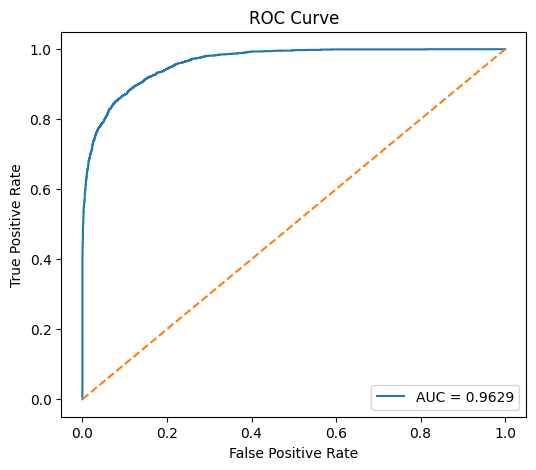

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


y_test_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)


auc_score = roc_auc_score(y_test, y_test_proba)


plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0,1], [0,1], linestyle='--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [130]:
import pandas as pd

new_customer = pd.DataFrame({
    'age': [26],
    'gender': ['female'],
    'education_level': ['Associate'],
    'annual_income': [81238],
    'employment_experience_years': [3.0],
    'home_ownership_status': ['RENT'],
    'loan_amount': [25000],
    'loan_purpose': ['PERSONAL'],
    'interest_rate': [15.21],
    'loan_to_income_ratio': [0.31],
    'credit_history_length_years': [2.0],
    'credit_score': [531],
    'prior_default_flag': ['NO']
})



In [131]:
proba = best_model.predict_proba(new_customer)[:, 1][0]
prediction = int(proba >= 0.6)   # use your chosen threshold

print("Default Probability:", round(proba, 4))
print("Prediction:", prediction)


Default Probability: 0.9701
Prediction: 1


In [132]:
import pickle


with open("model1.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("Model saved successfully as model.pkl")

Model saved successfully as model.pkl
